In [1]:
import pandas as pd
import csv
import io

myfile = "turbostress-report/i7-baremetal-loadstep10.csv"

df = pd.DataFrame(pd.read_csv(myfile))
df

,test,threads,load,PkgWatt,RAMWatt,PkgTmp
0,CPUStress,16,0,14.84,0.0,42.4
1,CPUStress,16,10,46.81,0.0,55.3
2,CPUStress,16,20,62.88,0.0,64.5
3,CPUStress,16,30,99.89,0.0,83.7
4,CPUStress,16,40,116.22,0.0,96.9
5,CPUStress,16,50,96.14,0.0,89.1
6,CPUStress,16,60,105.79,0.0,97.3
7,CPUStress,16,70,108.86,0.0,99.6
8,CPUStress,16,80,104.25,0.0,100.0
9,CPUStress,16,90,98.08,0.0,98.4


--ipsec-mb, a stress test that performs cryptographic processing using advanced instructions like AVX-512 (test called ipsec later). We wanted to observe the impact of such instructions on power consumption.  

--vm, a test that specifically performs memory stress methods so that we can observe the impact of memory-intensive workloads (test called VMStress later).  

--maximize, in this test stress-ng will launch different types of stressors (CPU, cache, memory, file) and set these to the maximum settings allowed in order to get an estimate of a worst-case scenario (test called maximize later).  


https://medium.com/teads-engineering/estimating-aws-ec2-instances-power-consumption-c9745e347959


In [2]:
test_name = 'CPUStress'
df_test = df[df['test'] == test_name]
df_test

,test,threads,load,PkgWatt,RAMWatt,PkgTmp
0,CPUStress,16,0,14.84,0.0,42.4
1,CPUStress,16,10,46.81,0.0,55.3
2,CPUStress,16,20,62.88,0.0,64.5
3,CPUStress,16,30,99.89,0.0,83.7
4,CPUStress,16,40,116.22,0.0,96.9
5,CPUStress,16,50,96.14,0.0,89.1
6,CPUStress,16,60,105.79,0.0,97.3
7,CPUStress,16,70,108.86,0.0,99.6
8,CPUStress,16,80,104.25,0.0,100.0
9,CPUStress,16,90,98.08,0.0,98.4


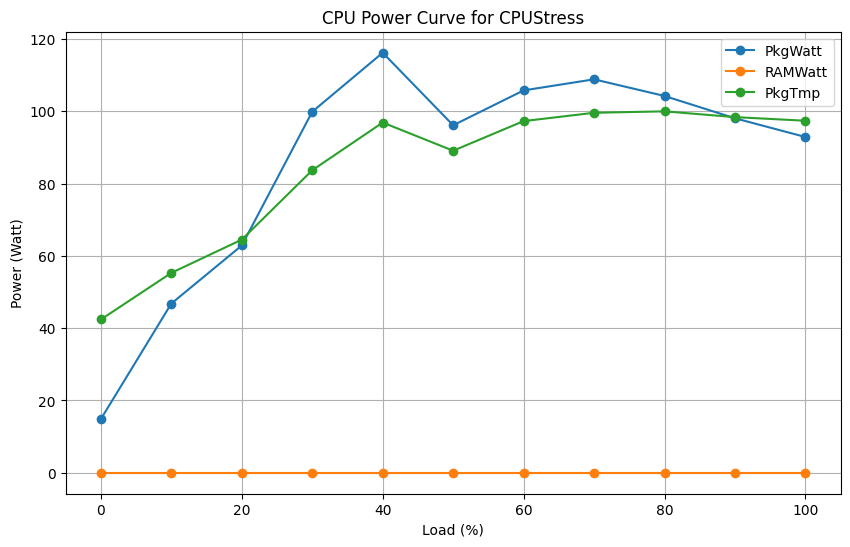

In [3]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df_test['load'], df_test['PkgWatt'], marker='o', label='PkgWatt')
plt.plot(df_test['load'], df_test['RAMWatt'], marker='o', label='RAMWatt')
plt.plot(df_test['load'], df_test['PkgTmp'], marker='o', label='PkgTmp')
plt.xlabel('Load (%)')
plt.ylabel('Power (Watt)')
plt.title(f'CPU Power Curve for {test_name}')
plt.legend()
plt.grid(True)
plt.show()

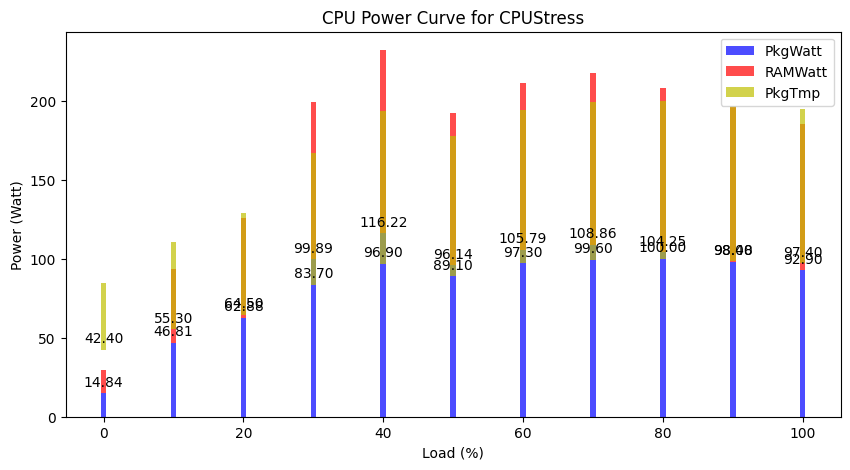

In [4]:
import matplotlib.pyplot as plt

# Plot the data
fig, ax = plt.subplots(figsize=(10, 5))
bar1 = ax.bar(df_test['load'], df_test['PkgWatt'], label='PkgWatt', color='b', alpha=0.7)
bar2 = ax.bar(df_test['load'], df_test['PkgWatt'], bottom=df_test['PkgWatt'], label='RAMWatt', color='r', alpha=0.7)
bar2 = ax.bar(df_test['load'], df_test['PkgTmp'], bottom=df_test['PkgTmp'], label='PkgTmp', color='y', alpha=0.7)

ax.set_xlabel('Load (%)')
ax.set_ylabel('Power (Watt)')
ax.set_title(f'CPU Power Curve for {test_name}')
ax.legend()

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        width = 0.6  # the width of the bars: can also be len(x) sequence
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)

# plt.grid(True)
plt.show()